In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print('Libraries Imported!')

Libraries Imported!


In [2]:
#importing dataset
df=pd.read_csv('covid19_Confirmed_dataset.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
#deleting useless columns like lat,long
df.drop(['Lat','Long'],axis=1,inplace=True)

In [4]:
#aggregating the rows by country
df_agg=df.groupby('Country/Region').sum()
df_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


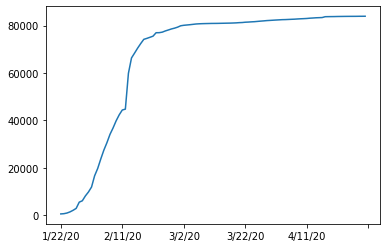

In [5]:
df_agg.loc['China'].plot();

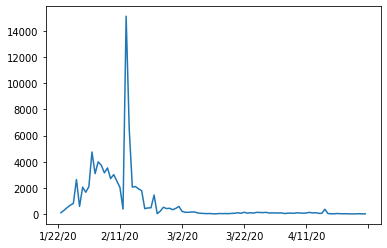

In [6]:
#infection rate in china. Infection refers to the difference between no. of cases in two consecutive days.
df_agg.loc['China'].diff().plot();

In [7]:
#find maximum infection rate in China
df_agg.loc['China'].diff().max()

15136.0

In [8]:
#find maximum infection rate for each country and adding this list as a column in dataset
max_infect_rate=[]
for c in df_agg.index:
    max_infect_rate.append(df_agg.loc[c].diff().max())
df_agg['Maximum Infection Rate']=max_infect_rate
df_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Maximum Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [9]:
#Removing all columns and kepeing only Maximum Infection Rate column;
corona_data=pd.DataFrame(df_agg['Maximum Infection Rate'])
corona_data

,Maximum Infection Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [10]:
#importing another dataset
#This consists of score of various in different countries
report=pd.read_csv('worldwide_happiness_report.csv')
report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [11]:
#Removing useless columns from second Dataset
report.drop(['Overall rank','Score','Generosity','Perceptions of corruption'],axis=1,inplace=True)
report

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [12]:
#Setting Country/region as index so that joining of datasets can be done easily
report.set_index('Country or region',inplace=True)

In [13]:
#joining both datasets
data=corona_data.join(report,how='inner')
data

,Maximum Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [14]:
#correlation matrix to see the relationship between Maximum Infection Rate and other factors
data.corr()

,Maximum Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Maximum Infection Rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


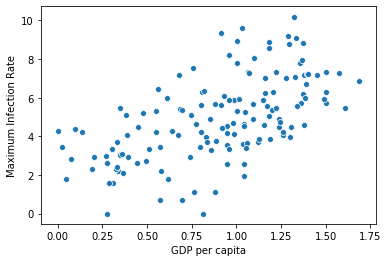

In [15]:
#Representing relationship between MaxInfectionRate and various factors
#MaxInfectionRate vs GDP per capita
#np.log is used to normalize the MaxInfecRate
sns.scatterplot(data['GDP per capita'],np.log(data['Maximum Infection Rate']));

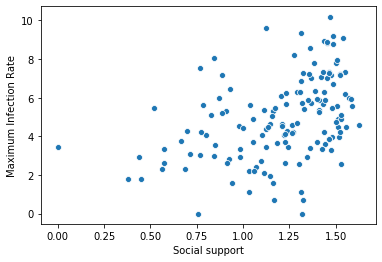

In [16]:
#MaxInfectionRate vs Social Support
sns.scatterplot(data['Social support'],np.log(data['Maximum Infection Rate']));

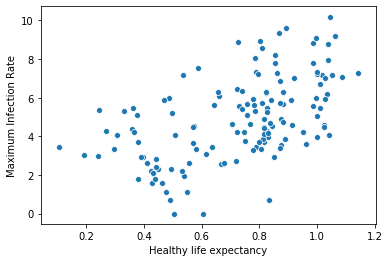

In [17]:
#MaxInfectionRate vs Healthy life expectancy
sns.scatterplot(data['Healthy life expectancy'],np.log(data['Maximum Infection Rate']));

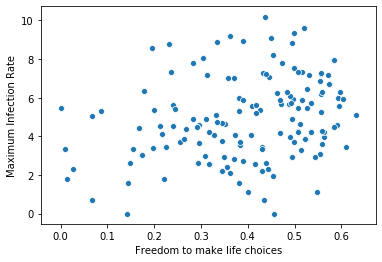

In [18]:
#MaxInfectionRate vs Freedom to make life choices
sns.scatterplot(data['Freedom to make life choices'],np.log(data['Maximum Infection Rate']));

In [19]:
#Third Dataset
deaths=pd.read_csv('covid19_deaths_dataset.csv')
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
deaths.drop(['Lat','Long'],axis=1,inplace=True)
death_agg=deaths.groupby('Country/Region').sum()
death_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,2,2,2,2,2,2
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [21]:
#To remove MaxInfecRate Column
df_agg=df_agg.iloc[:,:-1]

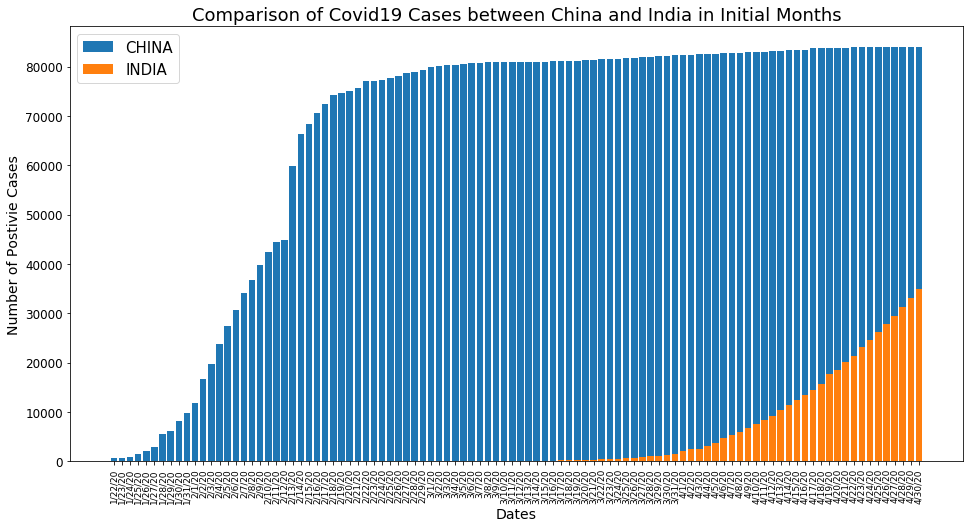

In [22]:
plt.figure(figsize=(16,8))
plt.bar(df_agg.columns,df_agg.loc['China'])
plt.bar(df_agg.columns,df_agg.loc['India'])
plt.xticks(rotation=90,fontsize=9);
plt.yticks(fontsize=12)
plt.legend(('CHINA','INDIA'),loc=0,fontsize=15)
plt.xlabel('Dates',fontsize=14);
plt.ylabel('Number of Postivie Cases',fontsize=14)
plt.title('Comparison of Covid19 Cases between China and India in Initial Months',fontsize=18);

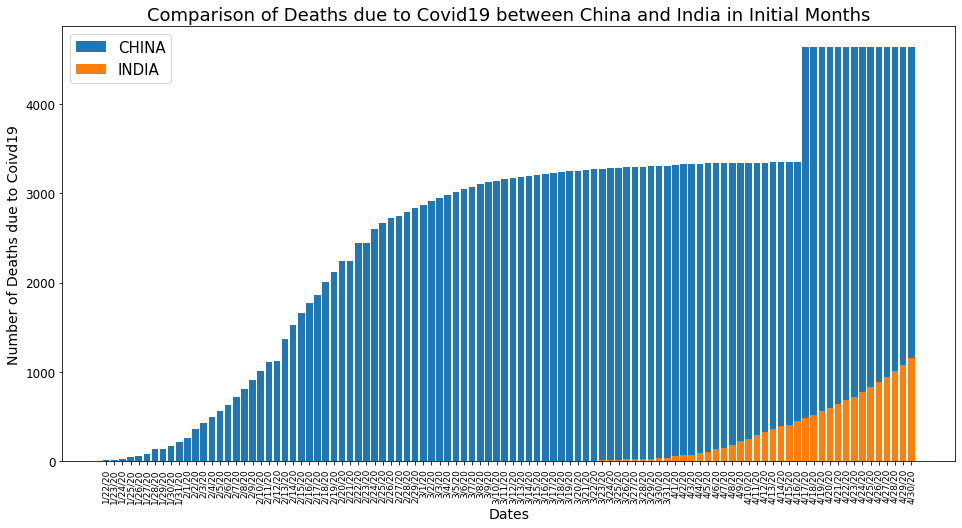

In [23]:
plt.figure(figsize=(16,8))
plt.bar(death_agg.columns,death_agg.loc['China'])
plt.bar(death_agg.columns,death_agg.loc['India'])
plt.xticks(rotation=90,fontsize=9);
plt.yticks(fontsize=12)
plt.legend(('CHINA','INDIA'),loc=0,fontsize=15)
plt.xlabel('Dates',fontsize=14);
plt.ylabel('Number of Deaths due to Coivd19',fontsize=14)
plt.title('Comparison of Deaths due to Covid19 between China and India in Initial Months',fontsize=18);